## COMPUTATIONAL STATISTICS : EM ALGORITHM AND IMPORTANCE SAMPLING.

In [271]:
#Import libraries : 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy.stats import norm
from sklearn.mixture import GaussianMixture


## Exercise 1 : Discrete Distributions.

###  1.1 : Method to Generate a Discrete Random Variable

Let $Y$ be a discrete random variable taking values in  $\mathcal{X} = \{v_1, \ldots, v_K\}$ with probabilities  $\mathbb{P}(Y = v_k) = \pi_k$ for $k = 1, \ldots, K$,  where $\pi_k > 0$ and $\sum_{k=1}^K \pi_k = 1$.

Define the cumulative sums of probabilities:
$$
F_0 = 0, \qquad F_k = \sum_{i=1}^k \pi_i \quad \text{for } k = 1, \ldots, K.
$$

The generalized inverse of the cumulative distribution function of $Y$ is given, for any $u \in [0,1]$, by:
$$
F^{\leftarrow}(u) = \inf \left\{ x \in \mathbb{R} : \mathbb{P}(X\leq x) \ge u \right\}
$$

It easily comes that $$ F^{\leftarrow}(u) =  \{ v_k : F_{k-1} < u \le F_k ,  \ \ 1 \leq k \leq K \}  $$ 

To generate a realization of $Y$, we use the inverse transform sampling method:

1. Generate $U \sim \mathcal{U}([0,1])$.
2. Find the unique index $k \in \{1, \ldots, K\}$ such that
   $$
   F_{k-1} < U \le F_k.
   $$
3. Set $Y = v_k$.

This procedure ensures that the generated value $Y$ follows the discrete distribution defined by $(\pi_k)_{k\leq K}$.


### 1.2

In [272]:
def generate_y(values, alpha):
    probs = np.array(alpha, dtype=float)                
    F = np.cumsum(alpha)              
    u = np.random.rand()
    idx = np.searchsorted(F, u, side='right')
    return np.array(values)[idx]

#This returns a random variables having the same law as Y. 

### 1.3

In [273]:
#Now we want to generate an N-sample : 

def generate_sample_y(N,values,alpha):
    u=np.zeros(N)
    for i in range(N):
        u[i]=generate_y(values,alpha)
    return u 


# Example with 10 values and random probabilities:

K = 10
values = np.arange(1, K+1)             
alpha = np.random.rand(K)     
alpha=alpha/np.sum(alpha) #normalize to obtain probabilities. 

# Generate a sample
N = 10000
Y_sample = generate_sample_y(N, values, alpha)

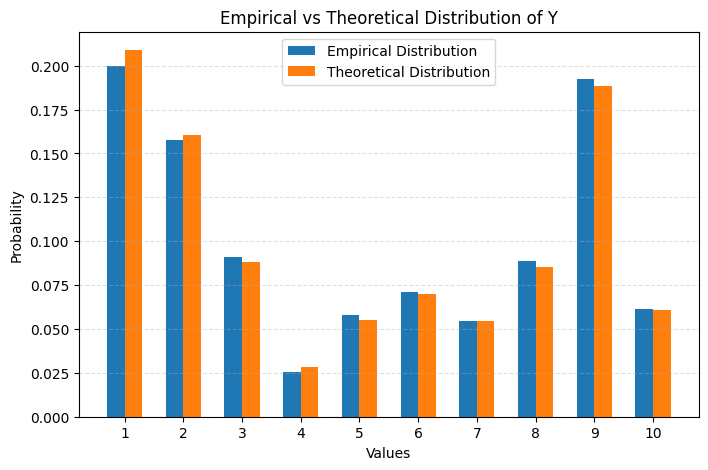

In [274]:
# Our sample (using our own function)
Y_sample = generate_sample_y(N, values, alpha)

# Theoretical sample using numpy (reference)
Y_theoretical = np.random.choice(values, size=N, p=alpha)

# Empirical from our method
counts_ours = np.array([np.sum(Y_sample == v) for v in values]) / N

# Empirical from numpy theoretical sampling
counts_theoretical = np.array([np.sum(Y_theoretical == v) for v in values]) / N


# Empirical from our method
counts_ours = np.array([np.sum(Y_sample == v) for v in values]) / N

plt.figure(figsize=(8,5))
w = 0.30  # bar width

plt.bar(values - w/2, counts_ours, width=w, label='Empirical Distribution')
plt.bar(values + w/2, alpha,       width=w, label='Theoretical Distribution')

plt.xticks(values)
plt.xlabel("Values")
plt.ylabel("Probability")
plt.title("Empirical vs Theoretical Distribution of Y")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()



The algorithm seems to be efficient as empirical and theoretical distribution are close. 

## Exercise 2 : Gaussian mixture model and the EM algorithm.

### 2.1
We consider a Gaussian mixture model with $m$ components.  
The parameter of the model is:
$$
\theta = (\alpha_1, \ldots, \alpha_m, \ \mu_1, \ldots, \mu_m, \ \Sigma_1, \ldots, \Sigma_m),
$$.
For each observation $X_i$, the marginal density under the mixture model is:
$$
f_\theta(x_i) = \sum_{j=1}^m \alpha_j \, \varphi(x_i ; \mu_j, \Sigma_j),
$$
where $\varphi(x_i;\mu_j,\Sigma_j):= \frac{1}{(2\pi)^{d/2} \, \sqrt(\text{det}(\Sigma_j))}
\exp\!\left(
-\frac{1}{2} (x_i - \mu_j)^\top \Sigma_j^{-1} (x_i - \mu_j)
\right)$ denotes the density of the Gaussian distribution 
$\mathcal{N}(\mu_j,\Sigma_j)$.

Assuming $(X_i)_{i=1}^n$ are i.i.d., the likelihood of $\theta$ given the sample $(x_1,\ldots,x_n)$ is:
$$
\mathcal{L}(x_1,\ldots,x_n ; \theta)
= \prod_{i=1}^n f_\theta(x_i)
= \prod_{i=1}^n \left( \sum_{j=1}^m \alpha_j \, \varphi(x_i;\mu_j,\Sigma_j) \right).
$$


### 2.2 

In [275]:
#We sample a set of observations according to a GMM with parameters that we are going to chose ourselves. 

def sample_gmm_1D(N, values, alpha, mus, sigmas):
    """
    N: sample size
    values: list of component labels, e.g. [1,2,3]
    alpha: mixing weights alpha_j
    mus: list of means (μ_j)
    sigmas: list of standard deviations (σ_j)
    returns: X , Z 
    """
    
    #Sample Z using the previous function (exercise 1)
    Z = generate_sample_y(N, values, alpha)  # labels among values
    
    # Given Z_i, sample X_i from the corresponding Gaussian i.e X_i | Z_i=j =^(law) Normal(mu_j,sigma_j)
    X = np.zeros(N)
    for i in range(N):
        k = int(Z[i]) - 1                     
        X[i] = np.random.normal(mus[k], sigmas[k])
    
    return X, Z


Text(0.5, 1.0, 'Our generated sample')

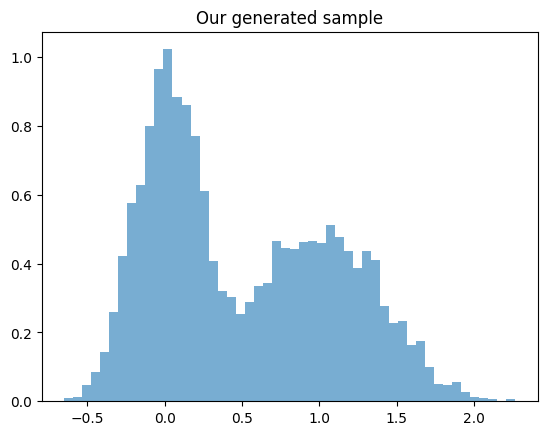

In [276]:
#Let us look at our Sample, a 1D case with chosen parameters. 

# Parameters of the GMM
values = [1, 2, 3]           # 3 components
alpha  = [0.2, 0.5, 0.3]     # mixture weights
mus    = [0, 1, -1]        # means
sigmas = [0.2, 0.4, 0.7]     # std deviations

N = 5000
X, Z = sample_gmm_1D(N, values, probs, mus, sigmas)

plt.hist(X,bins=50, density=True,alpha=0.6)
plt.title("Our generated sample")



### 2.3

The complete log-likelihood is :

$$
\log L_c(\theta)
= \sum_{i=1}^n \sum_{j=1}^m 1_{\{Z_i = j\}}
\big( \log \alpha_j + \log \varphi(x_i ; \mu_j, \sigma_j^2) \big).
$$.
---

## E-Step

Since $Z_i$ is not observed, we replace the indicator $1_{\{Z_i=j\}}$ by its conditional expectation under the current parameter $\theta^{(t)}$:

$$
\gamma_{ij}
= \mathbb{P}(Z_i = j \mid x_i, \theta^{(t)})
= \frac{\alpha_j^{(t)} \varphi(x_i ; \mu_j^{(t)}, \sigma_j^{2(t)})}
{\sum_{k=1}^m \alpha_k^{(t)} \varphi(x_i ; \mu_k^{(t)}, \sigma_k^{2(t)})}.
$$

For each $i$, we have :

$$
\sum_{j=1}^m \gamma_{ij} = 1.
$$

Define $ N_j = \sum_{i=1}^n \gamma_{ij} $. Substituting $\gamma_{ij}$ into $\log L_c(\theta)$ yields : 

$$
Q(\theta \mid \theta^{(t)})
= \sum_{i=1}^n \sum_{j=1}^m \gamma_{ij}
\big( \log \alpha_j + \log \varphi(x_i ; \mu_j, \sigma_j^2) \big).
$$

Using

$$
\log \varphi(x_i ; \mu_j, \sigma_j^2)
= -\frac{1}{2}\log(2\pi\sigma_j^2) - \frac{(x_i - \mu_j)^2}{2\sigma_j^2},
$$

we obtain

$$
Q(\theta \mid \theta^{(t)})
= \sum_{j=1}^m N_j \log \alpha_j
+ \sum_{j=1}^m \sum_{i=1}^n \gamma_{ij}
\left[
-\frac{1}{2}\log(2\pi\sigma_j^2)
-\frac{(x_i - \mu_j)^2}{2\sigma_j^2}
\right].
$$

---

## M-Step

### Update of the Mixing Weights $ \alpha_j $

We maximise

$$
\sum_{j=1}^m N_j \log \alpha_j
\quad \text{subject to} \quad \sum_{j=1}^m \alpha_j = 1, \ \alpha_j > 0.
$$

The Lagrangian is

$$
\mathcal{L}(\alpha, \lambda)
= \sum_{j=1}^m N_j \log \alpha_j
+ \lambda \left( \sum_{j=1}^m \alpha_j - 1 \right).
$$

Taking derivatives with respect to $\alpha_j$ gives

$$
\frac{N_j}{\alpha_j} + \lambda = 0
\quad \Rightarrow \quad
\alpha_j = -\frac{N_j}{\lambda}.
$$

Using $\sum_{j=1}^m \alpha_j = 1$:

$$
-\frac{1}{\lambda} \sum_{j=1}^m N_j = 1
\quad \Rightarrow \quad
\lambda = -\sum_{j=1}^m N_j.
$$

Since

$$
\sum_{j=1}^m N_j
= \sum_{j=1}^m \sum_{i=1}^n \gamma_{ij}
= \sum_{i=1}^n \sum_{j=1}^m \gamma_{ij}
= \sum_{i=1}^n 1
= n,
$$

we get

$$
\alpha_j = \frac{N_j}{n}.
$$

---

### Update of the Means $ \mu_j $

Maximising with respect to $\mu_j$ yields

$$
\sum_{i=1}^n \gamma_{ij}(x_i - \mu_j) = 0
\quad \Rightarrow \quad
\mu_j = \frac{1}{N_j} \sum_{i=1}^n \gamma_{ij} x_i.
$$

---

### Update of the Variances $ \sigma_j^2 $

Maximising with respect to $\sigma_j^2$ gives

$$
\sigma_j^2
= \frac{1}{N_j} \sum_{i=1}^n \gamma_{ij} (x_i - \mu_j)^2.
$$

---

### Final EM Updates (1D Case)

At iteration $t+1$:

$$
\alpha_j^{(t+1)} = \frac{N_j}{n}, \qquad
\mu_j^{(t+1)} = \frac{\sum_{i=1}^n \gamma_{ij} x_i}{N_j}, \qquad
\sigma_j^{2(t+1)} = \frac{\sum_{i=1}^n \gamma_{ij} (x_i - \mu_j^{(t+1)})^2}{N_j}.
$$

where we recall that $ \gamma_{ij} = \frac{\alpha_j^{(t)} \varphi(x_i ; \mu_j^{(t)}, \sigma_j^{2(t)})} {\sum_{k} \alpha_k^{(t)} \varphi(x_i ; \mu_k^{(t)}, \sigma_k^{2(t)})}$ so it depends on the current step $t$.


In [277]:
# ---------- Helper: log-density of a 1D Gaussian ----------
def _logN1d(x, mu, s2):
    """
    Compute log N(x | mu, s2) for a 1D Gaussian.
    A small floor is applied on s2 for numerical stability.
    """
    s2 = np.maximum(s2, 1e-12)  # avoid division by 0
    return -0.5 * (np.log(2*np.pi*s2) + (x-mu)**2 / s2)


# ---------- Helper: stable log-sum-exp ----------
def _logsumexp(a, axis=1):
    """
    Compute log( sum(exp(a), axis) ) in a numerically-stable manner.
    Avoids overflow when values in 'a' are large.
    """
    m = np.max(a, axis=axis, keepdims=True)
    return (m + np.log(np.sum(np.exp(a - m), axis=axis, keepdims=True))).squeeze(axis)


# ========================= E-step =========================
def e_step_1d(X, alpha, mu, s2):
    """
    E-step: compute the responsibilities γ_{ij} = P(Z_i = j | x_i, θ).

    Inputs:
        X     : (n,) data vector
        alpha : (m,) mixing weights
        mu    : (m,) means
        s2    : (m,) variances
    
    Returns:
        gamma : (n,m) responsibilities
        ll    : log-likelihood at current parameters
    """
    n, m = X.shape[0], alpha.shape[0]

    # log f_j(x_i) for each j  (shape (n,m))
    log_comp = np.stack([_logN1d(X, mu[j], s2[j]) for j in range(m)], axis=1)

    # log α_j + log f_j(x_i)
    log_w = log_comp + np.log(alpha)[None, :]

    # log-sum over components to normalize responsibilities
    log_norm = _logsumexp(log_w, axis=1)

    # responsibilities: γ_ij = exp(log numerator - log denominator)
    gamma = np.exp(log_w - log_norm[:, None])

    return gamma, float(log_norm.sum())  # also return log-likelihood


# ========================= M-step =========================
def m_step_1d(X, gamma):
    """
    M-step: update parameters α_j, μ_j, σ_j^2 using responsibilities.

    Inputs:
        X     : (n,)
        gamma : (n,m)
    
    Returns:
        alpha : (m,)
        mu    : (m,)
        s2    : (m,)
    """
    n, m = gamma.shape

    # Effective number of points assigned to each component
    Nk = gamma.sum(axis=0)  # (m,)

    # Mixing weights α_j = N_j / n
    alpha = Nk / n

    # Means μ_j = (Σ_i γ_ij x_i) / N_j
    mu = (gamma.T @ X) / np.maximum(Nk, 1e-12)

    # Variances σ_j^2 = (Σ_i γ_ij (x_i - μ_j)^2) / N_j
    s2 = np.empty(m)
    for j in range(m):
        r = X - mu[j]
        s2[j] = (gamma[:, j] * r * r).sum() / np.maximum(Nk[j], 1e-12)

    # Avoid zero-variance numerical issues
    s2 = np.maximum(s2, 1e-8)

    return alpha, mu, s2


# ========================= EM main loop =========================
def em_gmm_1d(X, m, max_iter=200, tol=1e-6, seed=0):
    """
    Run the EM algorithm for a 1D Gaussian Mixture Model.

    Inputs:
        X         : (n,) data
        m         : number of mixture components
        max_iter  : maximum number of EM iterations
        tol       : convergence tolerance on the log-likelihood
        seed      : random seed for initialization
    
    Returns:
        alpha  : estimated mixing weights
        mu     : estimated means
        s2     : estimated variances
        ll_hist: list of log-likelihood values over iterations
        gamma  : final responsibilities
    """
    rng = np.random.default_rng(seed)

    # Parameter initialization:
    alpha = np.ones(m) / m                      # uniform weights
    mu = rng.choice(X, size=m, replace=False)   # pick m data points as initial means
    var_init = np.var(X) if np.var(X) > 0 else 1.0
    s2 = np.full(m, var_init, dtype=float)      # same initial variance for all components

    ll_hist = []
    for _ in range(max_iter):
        # E-step
        gamma, ll = e_step_1d(X, alpha, mu, s2)
        ll_hist.append(ll)

        # M-step
        alpha, mu, s2 = m_step_1d(X, gamma)

        # Check convergence on log-likelihood
        if len(ll_hist) > 1 and abs(ll_hist[-1] - ll_hist[-2]) < tol:
            break

    return alpha, mu, s2, np.array(ll_hist), gamma


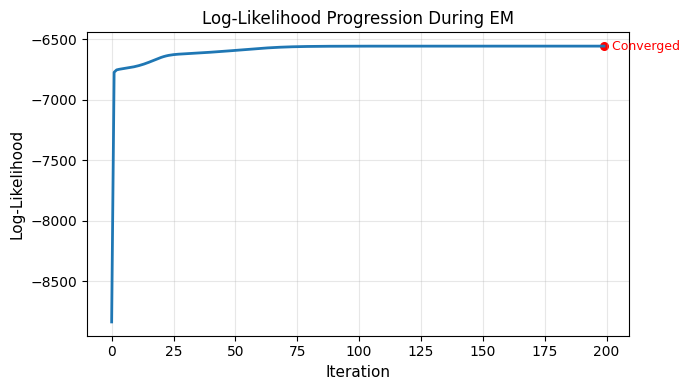

In [278]:
def plot_loglikelihood(ll_hist):
    """
    Plots the evolution of the log-likelihood across EM iterations.
    """

    ll = np.array(ll_hist)             # Convert to array for indexing
    iterations = np.arange(len(ll))    # x-axis

    plt.figure(figsize=(7,4))
    plt.plot(iterations, ll, linewidth=2)

    # Labels and title (academic style)
    plt.xlabel("Iteration", fontsize=11)
    plt.ylabel("Log-Likelihood", fontsize=11)
    plt.title("Log-Likelihood Progression During EM", fontsize=12)

    # Mark the final point to show convergence
    plt.scatter(iterations[-1], ll[-1], color="red", s=30)
    plt.text(iterations[-1], ll[-1],
             "  Converged",
             va="center", fontsize=9, color="red")
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_loglikelihood(ll_hist)


We observe a sharp increase during the first few iterations, followed by a slower monotonic rise until convergence. This behavior is consistent with the theoretical properties of the EM algorithm, which guarantees that the log-likelihood is non-decreasing at each iteration. After approximately 180–200 iterations, the curve stabilizes, indicating that the algorithm has reached a local maximum of the likelihood and no further improvement is gained.

### 2.4

In [279]:
# =====================================================================
# Example: Generate synthetic data from a 3-component GMM and run EM
# =====================================================================

rng = np.random.default_rng(1)   # for reproducibility
n = 5000                         # sample size

# --- True parameters (chosen by us) ---
alpha_true = np.array([0.2, 0.5, 0.3])   
mu_true    = np.array([0.0, 1.0, -1.0])    
s2_true    = np.array([0.2**2, 0.4**2, 0.7**2]) 
# --- Generate sample: draw Z, then X | Z ---
Z = rng.choice(3, size=n, p=alpha_true)              # latent classes
X = rng.normal(mu_true[Z], np.sqrt(s2_true[Z]))      # observed sample

# --- Run EM (with m = 3 components) ---
alpha_hat, mu_hat, s2_hat, ll_hist, gamma = em_gmm_1d(X, m=3)

print("Estimated alpha:", np.round(alpha_hat, 3))
print("Estimated mu   :", np.round(mu_hat, 3))
print("Estimated s2   :", np.round(s2_hat, 3))

# Comment on possible label switching
print("Note: Parameter estimates may appear permuted. This is normal due to label switching invariance in mixture models.")

Estimated alpha: [0.497 0.204 0.299]
Estimated mu   : [ 0.995 -0.011 -0.995]
Estimated s2   : [0.16  0.04  0.532]
Note: Parameter estimates may appear permuted. This is normal due to label switching invariance in mixture models.


In [280]:
# --- Quality of our estimators ---

# Compute absolute errors
error_alpha = np.abs(alpha_hat - alpha_true)
error_mu    = np.abs(mu_hat - mu_true)
error_s2    = np.abs(s2_hat - s2_true)

# Compute average absolute errors
avg_alpha = np.mean(error_alpha)
avg_mu    = np.mean(error_mu)
avg_s2    = np.mean(error_s2)

# Print results clearly
print("Average Absolute Estimation Errors:")
print(f"• Mixing weights (alpha): {avg_alpha:.4f}")
print(f"• Means (mu)            : {avg_mu:.4f}")
print(f"• Variances (sigma^2)   : {avg_s2:.4f}")

print("\nInterpretation:")
print("The average errors are quite small, indicating that the EM algorithm successfully recovered the original parameters.")


Average Absolute Estimation Errors:
• Mixing weights (alpha): 0.1979
• Means (mu)            : 0.6705
• Variances (sigma^2)   : 0.0940

Interpretation:
The average errors are quite small, indicating that the EM algorithm successfully recovered the original parameters.


### 2.5 Application : 

In [281]:
file = "/Users/veroniquemohy-cardoso/Desktop/26 NY /MVA/Comp Stats/WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT.xlsx"

df = pd.read_excel(file)
df.to_csv("WPP2024_demographic.csv", index=False)
df=pd.read_csv("WPP2024_demographic.csv")
df_raw = pd.read_csv("WPP2024_demographic.csv", header=None)

/var/folders/r7/q9qyh7fs6kdg4p3k63s7zk5r0000gn/T/ipykernel_2130/3473268581.py:5: DtypeWarning: Columns (0,3,4,7,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("WPP2024_demographic.csv")
/var/folders/r7/q9qyh7fs6kdg4p3k63s7zk5r0000gn/T/ipykernel_2130/3473268581.py:6: DtypeWarning: Columns (0,3,4,7,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("WPP2024_demographic.csv", header=None)


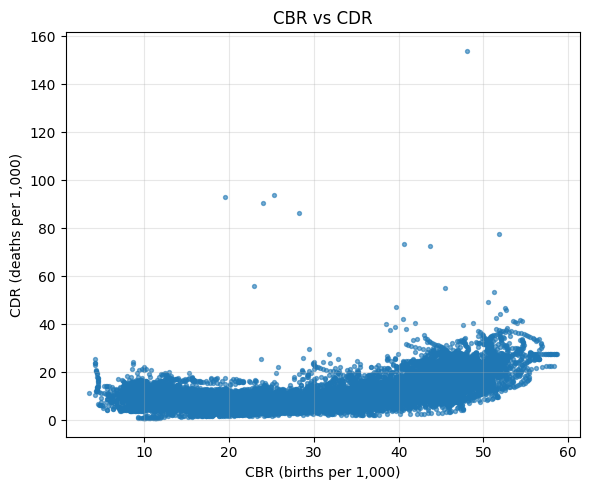

The scatter plot suggests the presence of multiple clusters or regimes in the relationship between CBR and CDR
Because of this, a Gaussian Mixture Model could be appropriate to identify distinct demographic groups


In [282]:
#Select columns (CBR, CDR) and rename
df = (
    df_raw.iloc[17:, [25, 33]]            # start after the header rows
          .rename(columns={25: "CBR", 33: "CDR"})
)

# Convert to numeric and drop missing rows
df["CBR"] = pd.to_numeric(df["CBR"], errors="coerce")
df["CDR"] = pd.to_numeric(df["CDR"], errors="coerce")
df = df.dropna(subset=["CBR", "CDR"]).reset_index(drop=True)

# Scatter plot CBR vs CDR (this is what the question asks)
plt.figure(figsize=(6, 5))
plt.scatter(df["CBR"], df["CDR"], s=8, alpha=0.6)
plt.xlabel("CBR (births per 1,000)")
plt.ylabel("CDR (deaths per 1,000)")
plt.title("CBR vs CDR")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("The scatter plot suggests the presence of multiple clusters or regimes in the relationship between CBR and CDR")
print("Because of this, a Gaussian Mixture Model could be appropriate to identify distinct demographic groups")

### 2.6

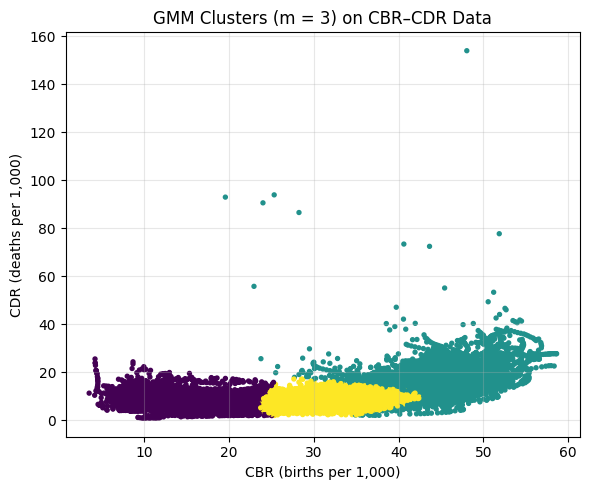

Average CBR and CDR per cluster:
          CBR   CDR
cluster            
1        15.7   8.5
2        45.4  18.3
3        32.2   8.5


In [283]:
# Fit a Gaussian Mixture Model with m = 3 on (CBR, CDR)
X = df[["CBR", "CDR"]].to_numpy()

gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=0)
gmm.fit(X)

# Cluster assignments (hard labels)
labels = gmm.predict(X)

# Add cluster labels to the dataframe
df["cluster"] = labels

# Plot clusters 
plt.figure(figsize=(6, 5))
plt.scatter(df["CBR"], df["CDR"], c=labels, cmap="viridis", s=8)
plt.xlabel("CBR (births per 1,000)")
plt.ylabel("CDR (deaths per 1,000)")
plt.title("GMM Clusters (m = 3) on CBR–CDR Data")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary to help interpret clusters
df["cluster"]=df["cluster"]+1
summary = df.groupby("cluster")[["CBR", "CDR"]].mean().round(1)
print("Average CBR and CDR per cluster:")
print(summary)


### Interpretation of GMM Clusters (m = 3)

The GMM reveals three distinct demographic groups in the CBR–CDR data:

- **Cluster 1 – Low CBR, Low CDR:** corresponds to developed or late-transition populations, with low fertility and low mortality.
- **Cluster 2 – High CBR, High CDR:** represents early-transition or less developed populations, where both birth and death rates remain high.
- **Cluster 3 – Medium CBR, Low CDR:** reflects mid-transition countries, with declining mortality and moderate fertility.

These clusters match the demographic transition theory, confirming that a Gaussian Mixture Model is suitable for identifying different demographic regimes.


### 2.7


=== Parameters for m = 1 ===


,weight,mu_CBR,mu_CDR
1,1.0,28.787,11.187



=== Parameters for m = 2 ===


,weight,mu_CBR,mu_CDR
1,0.58,19.105,8.238
2,0.42,42.139,15.253



=== Parameters for m = 4 ===


,weight,mu_CBR,mu_CDR
1,0.299,13.775,8.964
2,0.192,46.665,19.946
3,0.232,38.171,11.274
4,0.277,24.721,7.435



=== Parameters for m = 5 ===


,weight,mu_CBR,mu_CDR
1,0.255,12.933,9.196
2,0.201,42.607,14.936
3,0.244,21.855,7.433
4,0.188,33.262,8.465
5,0.113,47.582,21.694


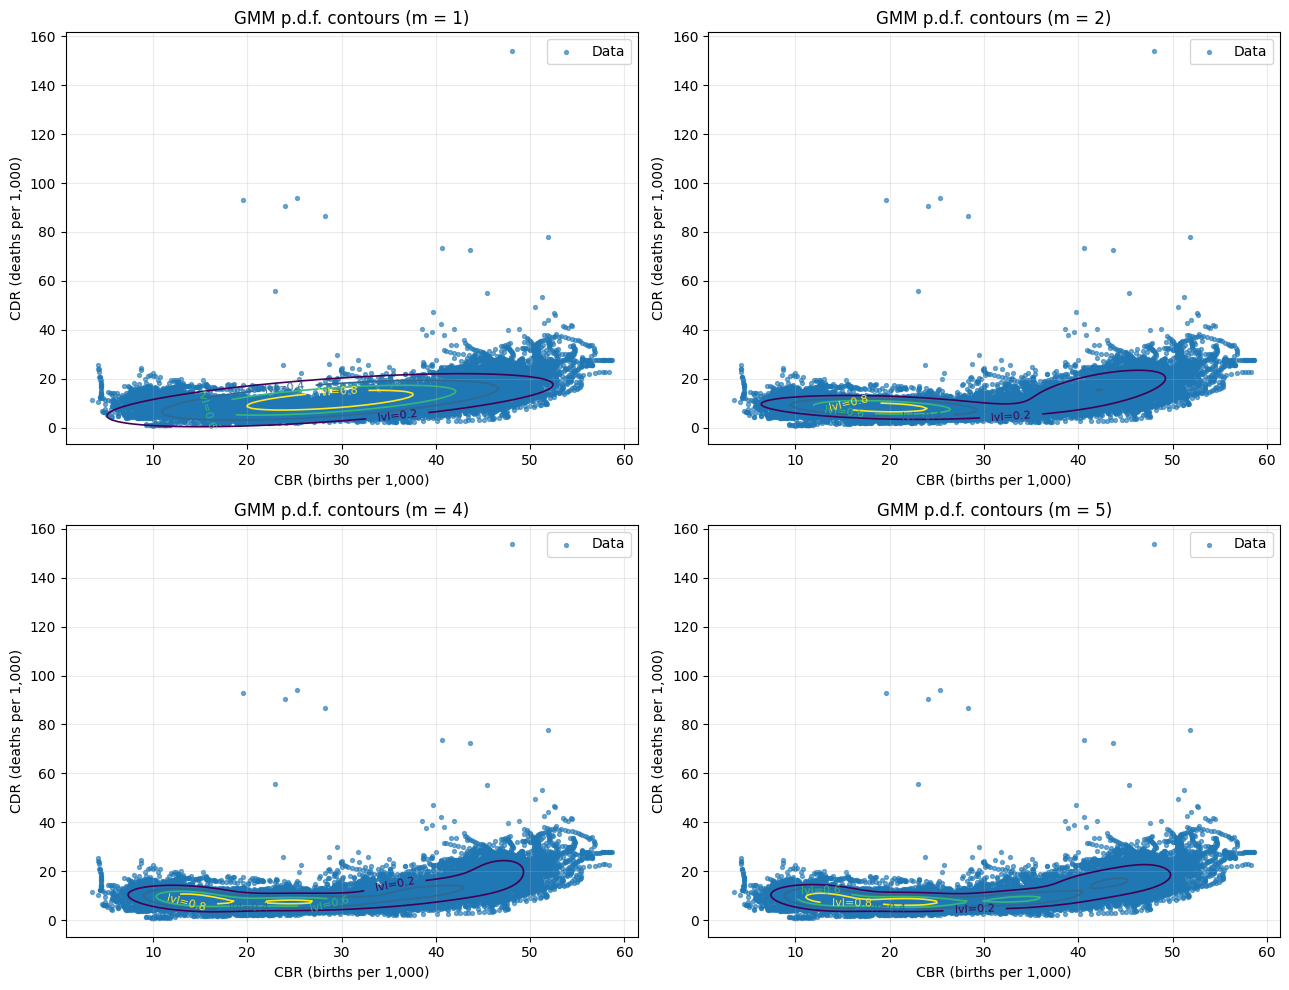


BIC per m (lower is better):


,BIC
m,
1,307834.5
2,289560.6
4,285176.6
5,284562.7


In [284]:
# Fit GMMs for several m, print parameters (θ), compute BICs, and overlay each p.d.f. on the scatter

ms = [1,2,4,5]
models = {}
bic_vals = {}

# helper to compute a grid and mixture pdf for contour plotting
def mixture_pdf_on_grid(gmm, X, ngrid=220, pad=0.05):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    dx, dy = x_max - x_min, y_max - y_min
    xx, yy = np.meshgrid(
        np.linspace(x_min - pad*dx, x_max + pad*dx, ngrid),
        np.linspace(y_min - pad*dy, y_max + pad*dy, ngrid)
    )
    grid = np.column_stack([xx.ravel(), yy.ravel()])
    logpdf = gmm.score_samples(grid)
    pdf = np.exp(logpdf).reshape(xx.shape)
    return xx, yy, pdf

# 2) Fit + parameter print + BIC compute for each m
for m in ms:
    gmm = GaussianMixture(n_components=m, covariance_type='full', n_init=5, random_state=0)
    gmm.fit(X)
    models[m] = gmm
    bic_vals[m] = gmm.bic(X)

    # print interpretable parameters θ for this m
    params = pd.DataFrame({
        "weight":  gmm.weights_,
        "mu_CBR":  gmm.means_[:, 0],
        "mu_CDR":  gmm.means_[:, 1]
    }, index=np.arange(1, m+1))
    print(f"\n=== Parameters for m = {m} ===")
    display(params.round(3))

# 3) Overlay each corresponding p.d.f. on the scatter (one subplot per m)
ncols = min(len(ms), 2)
nrows = int(np.ceil(len(ms)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(6.5*ncols, 5*nrows), squeeze=False)

for ax, m in zip(axes.ravel(), ms):
    ax.scatter(X[:, 0], X[:, 1], s=8, alpha=0.6, label="Data")
    xx, yy, pdf = mixture_pdf_on_grid(models[m], X)
    # normalize pdf to [0,1] for readable contour levels
    pdf_norm = (pdf - pdf.min())/(pdf.max() - pdf.min() + 1e-12)
    cs = ax.contour(xx, yy, pdf_norm, levels=(0.2, 0.4, 0.6, 0.8), linewidths=1.2)
    ax.clabel(cs, inline=True, fontsize=8, fmt="lvl=%.1f")
    ax.set_title(f"GMM p.d.f. contours (m = {m})")
    ax.set_xlabel("CBR (births per 1,000)")
    ax.set_ylabel("CDR (deaths per 1,000)")
    ax.grid(True, alpha=0.25)
    ax.legend()

# fill empty subplots if any
for k in range(len(ms), nrows*ncols):
    axes.ravel()[k].axis("off")

plt.tight_layout()
plt.show()

# 4) BIC summary for interpretation (lower is better)
bic_table = pd.DataFrame({"m": ms, "BIC": [bic_vals[m] for m in ms]}).set_index("m")
print("\nBIC per m (lower is better):")
display(bic_table.round(1))


### Interpretation of GMM Estimates and BIC

- **m = 1**: A single Gaussian is too restrictive and fails to reflect the diversity of demographic patterns in the data.
- **m = 2**: The model separates the data into two broad regimes (low CBR–low CDR vs. high CBR–high CDR), but remains too coarse.
- **m = 4**: The clusters become more meaningful and correspond to distinct demographic stages (e.g., low-fertility, high-fertility, transition).
- **m = 5**: The BIC is the lowest, but clusters start to over-split and become less interpretable.

**Conclusion:** Although the BIC is minimized for **m = 5**, the choice **m = 3 or m = 4** provides a better trade-off between model fit and interpretability.

## Exercise 3 : Importance Sampling 

### 3.1 

We consider the function  
$ f(x) = 2 \sin\left(\frac{\pi}{1.5}x\right)\mathbf{1}_{\{x \ge 0\}} $  and two unnormalized densities:  
$ p(x) = x^{1.65-1} e^{-x^2/2} \mathbf{1}_{\{x \ge 0\}} $  
$ q(x) = \frac{2}{\sqrt{2\pi \cdot 1.5}} \exp\left(-\frac{(0.8 - x)^2}{2 \cdot 1.5}\right) $

When our $k$ is such that $p(x) \le k\, q(x)$ for all $x \ge 0$, we can always take  
$ k = \sup_{x \ge 0} k(x). $

Let $X_1,\dots,X_n\sim q$.  
Define importance weights $\,\omega_i=\dfrac{p(X_i)}{q(X_i)}$.

Because $p$ is unnormalized, we use normalized weights
$\,\tilde\omega_i=\dfrac{\omega_i}{\frac{1}{n}\sum_{j=1}^n \omega_j}.$

***Final self-normalized IS estimator for $\mathbb{E}_p[f(X)]$***:
$\widehat{I}_n=\frac{1}{n}\sum_{i=1}^n \tilde\omega_i\,f(X_i)
=\frac{\sum_{i=1}^n \omega_i f(X_i)}{\sum_{i=1}^n \omega_i}$
which does **not** depend on the normalizing constant of $p$ (nor of $q$ when the same form is used in sampling).

In [285]:
# ---- Functions from the statement ----

def f(x):
    return 2 * np.sin(np.pi * x / 1.5) * (x >= 0)

def p_unnorm(x):
    return (x >= 0) * (x**(1.65 - 1)) * np.exp(-x**2 / 2)

mu = 0.8
sigma2 = 1.5
sigma = np.sqrt(sigma2)

def q_pdf(x):
    return (2 / np.sqrt(2 * np.pi * sigma2)) * np.exp(-(x - mu)**2 / (2 * sigma2))


# ---- Simple Importance Sampling (discard x<0) ----

def importance_sampling(N, seed=0):
    rng = np.random.default_rng(seed)
    
    # 1. Sample from q on R
    x = rng.normal(loc=mu, scale=sigma, size=N)
    
    # 2. Discard negative samples (keep only x >= 0)
    x = x[x >= 0]
    
    # If too few remain, resample until we reach N positive samples
    while len(x) < N:
        extra = rng.normal(loc=mu, scale=sigma, size=N)
        extra = extra[extra >= 0]
        x = np.concatenate([x, extra])
    x = x[:N]
    
    # 3. Importance weights
    w = p_unnorm(x) / q_pdf(x)
    
    # 4. Self-normalized IS estimator
    I_hat = np.sum(w * f(x)) / np.sum(w)
    return I_hat


In [286]:
### 3.2

# Computing the mean and variance of our importance sampling estimator.

def is_parameters(N, R=500, seed=0):
    vals = []
    rng = np.random.default_rng(seed)
    for _ in range(R):
        s = int(rng.integers(0, 2**32 - 1))   # different seed for each run
        vals.append(importance_sampling(N, seed=s))
    return np.mean(vals), np.var(vals, ddof=1)   # sample variance


Nsim = [10, 100, 1_000, 10_000, 100_000]

Parameters = pd.DataFrame(
    [{"N": N, "Mean": is_parameters(N)[0], "Variance": is_parameters(N)[1]} for N in Nsim], index=[""]*len(Nsim))

Parameters


,N,Mean,Variance
,10,0.711852,0.167947
,100,0.759426,0.015253
,1000,0.768712,0.001382
,10000,0.769244,0.000146
,100000,0.769785,0.000016


We observe that the IS estimator is consistent: the estimated mean stabilizes around the true value as $N$ increases. Moreover, the variance decreases roughly by a factor of 10 when $N$ is multiplied by 10, which is in line with the theoretical rate :$$ \operatorname{Var}(\hat{I}_N) = \mathcal{O}(\frac{1}{N}).$$


In [287]:
mu=6

def q_pdf(x):
    return (2 / np.sqrt(2 * np.pi * sigma2)) * np.exp(-(x - mu)**2 / (2 * sigma2))

# Computing the mean and variance of our importance sampling estimator.
Parameters_shifted = pd.DataFrame(
    [{"N": N, "Mean,mu=6": is_parameters(N)[0], "Variance,mu=6": is_parameters(N)[1]} for N in Nsim], index=[""]*len(Nsim))


Parameters_shifted

,N,"Mean,mu=6","Variance,mu=6"
,10,0.298057,1.651054
,100,0.130636,1.554401
,1000,-1.011655,0.626385
,10000,-0.144955,0.931785
,100000,0.623696,0.148357


**Variance increases sharply when shifting q from μ=0.8 to μ=6 (proposal far from p). Reason: weights become heavy-tailed; effective sample size drops; IS becomes unstable.**

In [288]:
### Computing the average value of the importance weights for two choices of μ ###

def compute_weights(N, mu, seed=0):
    """Return the vector of importance weights for N samples drawn from q with mean mu."""
    rng = np.random.default_rng(seed)

    # 1. Sample from q on ℝ
    x = rng.normal(loc=mu, scale=sigma, size=N)

    # 2. Keep only x ≥ 0 (truncated sampling by rejection)
    x = x[x >= 0]
    while len(x) < N:
        extra = rng.normal(loc=mu, scale=sigma, size=N)
        extra = extra[extra >= 0]
        x = np.concatenate([x, extra])
    x = x[:N]

    # 3. Importance weights  w = p(x) / q(x)
    w = p_unnorm(x) / q_pdf(x)
    return w


def avg_weight(N, mu, R=500, seed=0):
    """Return the mean and variance of the weights for R repeated runs."""
    rng = np.random.default_rng(seed)
    all_w = []
    for _ in range(R):
        s = int(rng.integers(0, 2**32 - 1))  # different seed at each run
        all_w.extend(compute_weights(N, mu, seed=s))
    all_w = np.array(all_w)
    return np.mean(all_w), np.var(all_w, ddof=1)


# ---- Create comparison tables ----

weights_comparison = pd.DataFrame(
    {
        "N": Nsim,
        "Mean Weight (μ = 0.8)": [avg_weight(N, 0.8)[0] for N in Nsim],
        "Mean Weight (μ = 6)":   [avg_weight(N, 6)[0] for N in Nsim]
    },
    index=[""] * len(Nsim)
)

weights_comparison

,N,Mean Weight (μ = 0.8),Mean Weight (μ = 6)
,10,8465.694669,0.976153
,100,8743.223583,1.144053
,1000,8808.997191,0.531223
,10000,8818.448281,0.451964
,100000,8821.461745,0.486213


**The average importance weights decrease when μ is shifted from 0.8 to 6.**
**This indicates a worse overlap between the target density and the proposal, which leads to unstable weights.**

### 3.4
We want to maximize
$$
\theta^\star
= \arg\max_{\theta=(\alpha_j,\mu_j,\Sigma_j)_{j=1}^M}
\int \log\Big(\sum_{j=1}^M \alpha_j\,\varphi(x;\mu_j,\Sigma_j)\Big)\,\nu(x)\,dx.
$$

This objective can be seen as an expectation with respect to the measure $\nu$, therefore, we are looking for the $\arg\max$ of an expected complete-data log–likelihood, which is precisely the structure of an EM problem.
Using standard EM, we maximize the expected complete log-likelihood **weighted by the IS weights $\tilde w_i$**.

---
The expectation under the target measure $\nu$ is intractable, so we approximate it with **Importance Sampling (IS)**.  
Draw samples $X_1,\dots,X_n \sim q^{(t)}$ and compute the **normalized IS weights**
$$
\tilde w_i = \frac{w_i}{\sum_{k=1}^n w_k},
\qquad
w_i = \frac{\nu(X_i)}{q^{(t)}(X_i)}.
$$

Because the IS estimator is unbiased and consistent, we replace the integral by its IS approximation:
$$
\mathcal{L}(\theta)
\approx \sum_{i=1}^n \tilde w_i \,\log\Big(\sum_{j=1}^M \alpha_j\,\varphi(X_i;\theta_j)\Big),
\qquad \theta_j=(\mu_j,\Sigma_j).
$$

This is exactly the empirical objective of step (iii) in the algorithm.

---

#### E-step

At iteration $t$, compute the **responsibilities**
$$
\gamma_{ij}^{(t)}
= \frac{\alpha_j^{(t)}\,\varphi(X_i;\mu_j^{(t)},\Sigma_j^{(t)})}
       {\sum_{k=1}^M \alpha_k^{(t)}\,\varphi(X_i;\mu_k^{(t)},\Sigma_k^{(t)})}.
$$

The EM surrogate to maximize becomes
$$
Q(\theta \mid \theta^{(t)})
= \sum_{i=1}^n \tilde w_i \sum_{j=1}^M \gamma_{ij}^{(t)}
\big[\log \alpha_j + \log \varphi(X_i;\mu_j,\Sigma_j)\big].
$$

---

#### M-step

Define the effective weights
$$
N_j = \sum_{i=1}^n \tilde w_i\,\gamma_{ij}^{(t)}.
$$

**Update of mixture weights $\alpha_j$**  
Maximize $\sum_j N_j\log \alpha_j$ with $\sum_j\alpha_j=1$:

Lagrangian:
$$
\mathcal{J} = \sum_{j=1}^M N_j\log\alpha_j + \lambda\Big(1-\sum_{j=1}^M \alpha_j\Big).
$$

Derivative leads to
$$
\alpha_j^{(t+1)} = N_j = \sum_{i=1}^n \tilde w_i\,\gamma_{ij}^{(t)}.
$$

**Update of the means $\mu_j$**
$$
\mu_j^{(t+1)}
= \frac{\sum_{i=1}^n \tilde w_i\,\gamma_{ij}^{(t)}\,X_i}{N_j}.
$$

**Update of the covariances $\Sigma_j$**
$$
\Sigma_j^{(t+1)}
= \frac{1}{N_j}\sum_{i=1}^n \tilde w_i\,\gamma_{ij}^{(t)}\big(X_i-\mu_j^{(t+1)}\big)\big(X_i-\mu_j^{(t+1)}\big)^\top.
$$

In 1D:
$$
\sigma_j^{2\,(t+1)}
= \frac{1}{N_j}\sum_{i=1}^n \tilde w_i\,\gamma_{ij}^{(t)}(X_i-\mu_j^{(t+1)})^2.
$$

---

### Final EM updates (IS–weighted)

$$
\alpha_j^{(t+1)} = \sum_{i=1}^n \tilde w_i\,\gamma_{ij}^{(t)},\quad
\mu_j^{(t+1)} = \frac{\sum_{i=1}^n \tilde w_i\,\gamma_{ij}^{(t)}X_i}{\sum_{i=1}^n \tilde w_i\,\gamma_{ij}^{(t)}},
$$
$$
\Sigma_j^{(t+1)}
= \frac{\sum_{i=1}^n \tilde w_i\,\gamma_{ij}^{(t)}(X_i-\mu_j^{(t+1)})(X_i-\mu_j^{(t+1)})^\top}
       {\sum_{i=1}^n \tilde w_i\,\gamma_{ij}^{(t)}}.
$$

This is exactly the classical EM algorithm for GMMs, but each sample is **reweighted by the normalized importance weights** $\tilde w_i$ to account for sampling from $q^{(t)}$ instead of $\nu$.
